In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from matplotlib.patches import Polygon

In [2]:
algorithm = 'KNN'
sweep_parameters = pd.read_csv('sweep_v2.csv',delimiter=',')
sweep_probabilities = pd.read_csv(algorithm+'_sweep_probabilities.csv',delimiter=',')

In [3]:
sweep_parameters.rename(columns={'0':'M1','1':'M2','2':'chi1','3':'chi2','4':'SNR'}, inplace=True)
sweep_parameters = sweep_parameters.round(4)
display(sweep_parameters)

,M1,M2,chi1,chi2,SNR
0,1.397,1.0000,0.0,0.0,10.0
1,1.794,1.0000,0.0,0.0,10.0
2,1.794,1.3970,0.0,0.0,10.0
3,2.191,1.0000,0.0,0.0,10.0
4,2.191,1.3970,0.0,0.0,10.0
...,...,...,...,...,...
79595,80.000,78.0151,1.0,1.0,10.0
79596,80.000,78.4121,1.0,1.0,10.0
79597,80.000,78.8090,1.0,1.0,10.0
79598,80.000,79.2060,1.0,1.0,10.0


In [4]:
sweep_parameters['P_NS'] = sweep_probabilities['P_NS']
sweep_parameters['P_REM'] = sweep_probabilities['P_REM']

In [5]:
chi1 = 1.0
chi2 = 1.0
SNR = 10.0

In [6]:
chi_select = sweep_parameters.loc[np.logical_and(sweep_parameters['chi1'] == chi1, \
                                                 sweep_parameters['chi2'] == chi2)]

snr_chi_select = chi_select.loc[chi_select['SNR']==SNR]
display(snr_chi_select)

,M1,M2,chi1,chi2,SNR,P_NS,P_REM
59700,1.397,1.0000,1.0,1.0,10.0,0.9885,0.9847
59701,1.794,1.0000,1.0,1.0,10.0,0.9885,0.9847
59702,1.794,1.3970,1.0,1.0,10.0,0.9885,0.9847
59703,2.191,1.0000,1.0,1.0,10.0,0.9885,0.9847
59704,2.191,1.3970,1.0,1.0,10.0,0.9885,0.9847
...,...,...,...,...,...,...,...
79595,80.000,78.0151,1.0,1.0,10.0,0.0123,0.0000
79596,80.000,78.4121,1.0,1.0,10.0,0.0123,0.0000
79597,80.000,78.8090,1.0,1.0,10.0,0.0123,0.0000
79598,80.000,79.2060,1.0,1.0,10.0,0.0123,0.0000


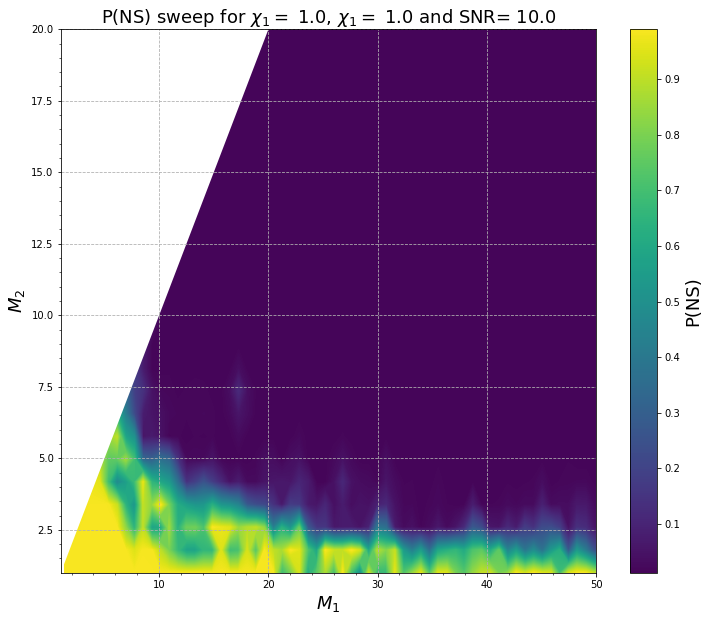

In [7]:
x = pd.Series(snr_chi_select['M1'])
y = pd.Series(snr_chi_select['M2'])

xi, yi = np.linspace(np.min(x), np.max(x), 100), np.linspace(np.min(y), np.max(y), 100)
xi, yi = np.meshgrid(xi, yi)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

z = pd.Series(snr_chi_select['P_NS'])
rbf = Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

plt.contourf(xi, yi, zi, 1000, cmap='viridis')
#plt.scatter(x, y, c=z, cmap='viridis')

cbar = plt.colorbar(norm=mpl.colors.Normalize(vmin=0, vmax=1))
cbar.set_label('P(NS)',fontsize=18)
cbar.set_ticks(np.linspace(0,1,11))
plt.clim(0,1)

#triangle_points = np.array([[np.min(xi),np.min(yi)], [np.min(xi),np.max(yi)], [np.max(xi),np.max(yi)]])
triangle_points = np.array([[0,0], [0,100], [100,100]])
triangle = Polygon(triangle_points, facecolor='w')
ax.add_patch(triangle)

plt.xlim([1,50])
plt.ylim([1,20])
plt.xlabel(r'$M_1$',fontsize=18)
plt.ylabel(r'$M_2$',fontsize=18)
plt.minorticks_on()
plt.grid(which='major',ls='--')
plt.title(r'P(NS) sweep for $\chi_1=$ %s, $\chi_1=$ %s and SNR= %s' %(str(chi1),str(chi2),str(SNR)),fontsize=18)
plt.savefig(algorithm+'_parameter_sweep_PNS_chi1_'+str(chi1)+'_chi2_'+str(chi2)+'_SNR_'+str(SNR)+'.png',dpi=300, facecolor="w")

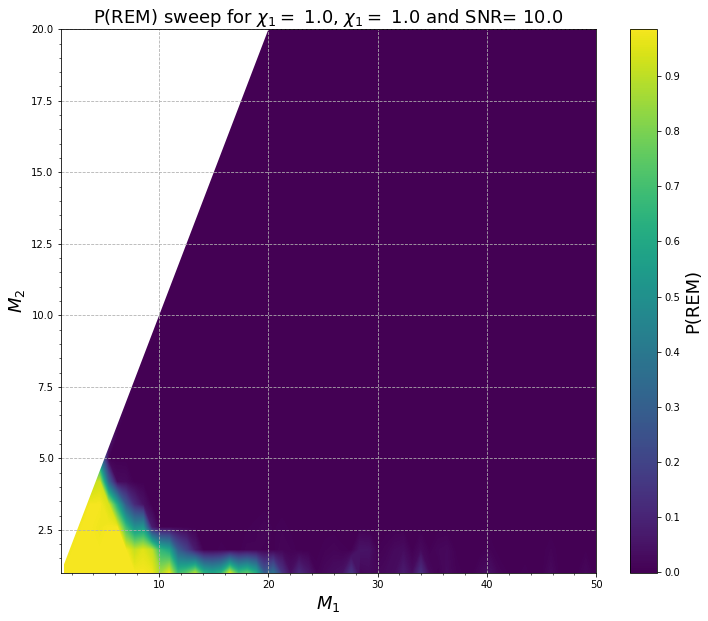

In [8]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

z = pd.Series(snr_chi_select['P_REM'])
rbf = Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

plt.contourf(xi, yi, zi, 1000, cmap='viridis')
#plt.scatter(x, y, c=z, cmap='viridis')

cbar = plt.colorbar(norm=mpl.colors.Normalize(vmin=0, vmax=1))
cbar.set_label('P(REM)',fontsize=18)
cbar.set_ticks(np.linspace(0,1,11))
plt.clim(0,1)

#triangle_points = np.array([[np.min(xi),np.min(yi)], [np.min(xi),np.max(yi)], [np.max(xi),np.max(yi)]])
triangle_points = np.array([[0,0], [0,100], [100,100]])
triangle = Polygon(triangle_points, closed=False,facecolor='w')
ax.add_patch(triangle)

plt.xlim([1,50])
plt.ylim([1,20])
plt.xlabel(r'$M_1$',fontsize=18)
plt.ylabel(r'$M_2$',fontsize=18)
plt.minorticks_on()
plt.grid(which='major',ls='--')
plt.title(r'P(REM) sweep for $\chi_1=$ %s, $\chi_1=$ %s and SNR= %s' %(str(chi1),str(chi2),str(SNR)),fontsize=18)
plt.savefig(algorithm+'_parameter_sweep_PREM_chi1_'+str(chi1)+'_chi2_'+str(chi2)+'_SNR_'+str(SNR)+'.png',dpi=300, facecolor="w")